# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('/content/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns in the given dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. There are no null rows or null value in the dataset.
2. Data quality is maintained by replacing missing values with 'not given' in the rating column.
3. The columns have been assigned appropriate data types.
4. The columns: cost_of_the_order,food_preparation_time and delivery_time are numerical features.
5. The columns: restaurant_name,cuisine_type, day_of_week and rating are categorial features.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There is no missing values in the dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
1. cost_of_the_order: The column have more values between the 50th and 75th percentiles compared to the between 25th and 50th percentiles. It looks like column is skewed right.
2. food_preparation_time: No significant skew observed in the data for this column.
3. delivery_time: No significant skew observed in the data for this column.
4. Average cost_of_order is 16.49, average food preparation time 27 minutes and average delivery time is 24 minutes.

### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
Out of 1898 orders, 736 orders are not rated, which is significantly huge number.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

#### Order ID


In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

There are no duplicates in order id column. All orders are unique

#### Customer ID


In [ ]:
# check unique customer ID
df['customer_id'].nunique()



1200

There are 1200 unique customers out of 1898 rows.

#### Restaurant name

In [ ]:
#check unique restaurant name
df['restaurant_name'].nunique()

178

In [ ]:
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


There are 178 unique restaurants in the given datasets. Shake Shack restaurant has most orders.

#### Cuisine Type


In [ ]:
# check unique cuisine types
df['cuisine_type'].nunique()

14

In [ ]:
df['cuisine_type'].value_counts(normalize='True').head(5)

,proportion
cuisine_type,
American,0.307692
Japanese,0.247629
Italian,0.157007
Chinese,0.113277
Mexican,0.040569


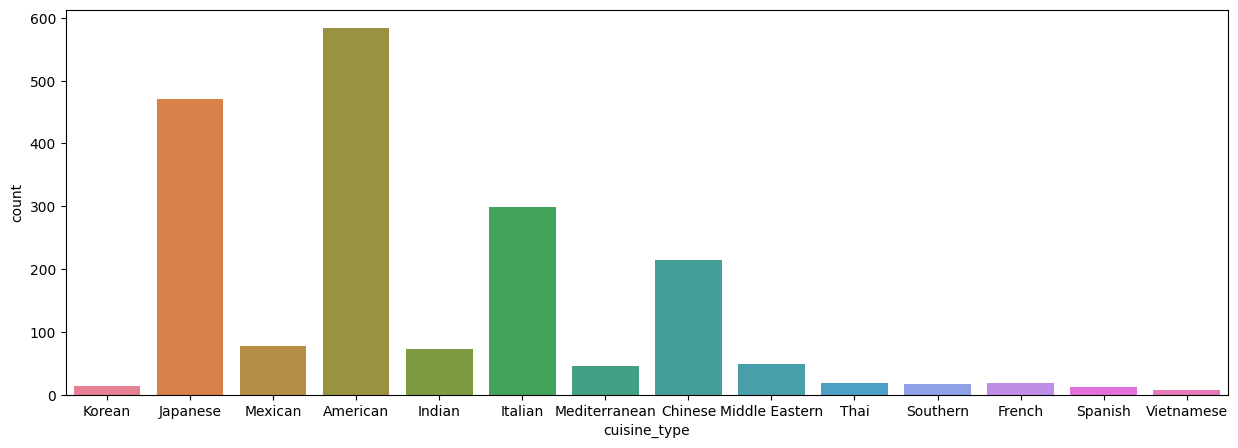

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = df['cuisine_type'],hue = df['cuisine_type'])


plt.show()

There are 14 unique cuisine types and most popular is American cuisine.     
Top 5 cuisine types are
American (30%), Japanese(24%) , Italian(15%) , Chinese(11%) and Mexican(4%)



#### Cost of the Order


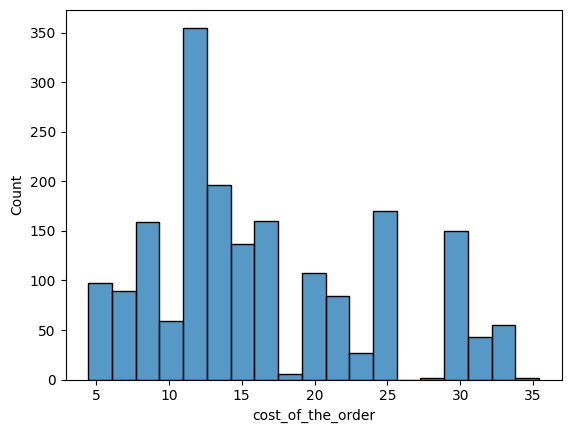

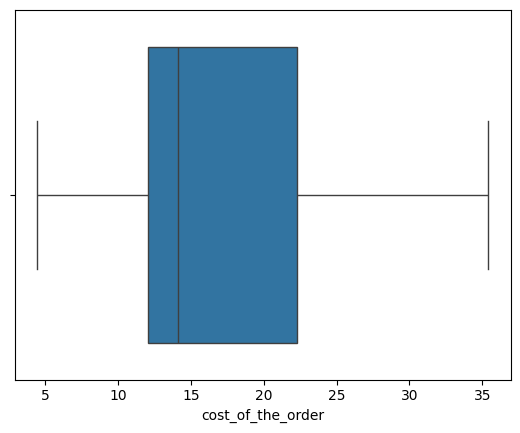

In [ ]:
sns.histplot(data = df, x = df['cost_of_the_order'])
plt.show()
sns.boxplot(data = df, x = df['cost_of_the_order'])
plt.show()

**Observation:**General range of order cost is between 5 to 35 dollars, most of orders are around 14 to 22 dollars. The column is skewed right.

#### Day of the Week

In [ ]:
df['day_of_the_week'].nunique()


2

In [ ]:
df['day_of_the_week'].value_counts(normalize = 'True')

,proportion
day_of_the_week,
Weekend,0.711802
Weekday,0.288198


<Axes: xlabel='day_of_the_week', ylabel='count'>

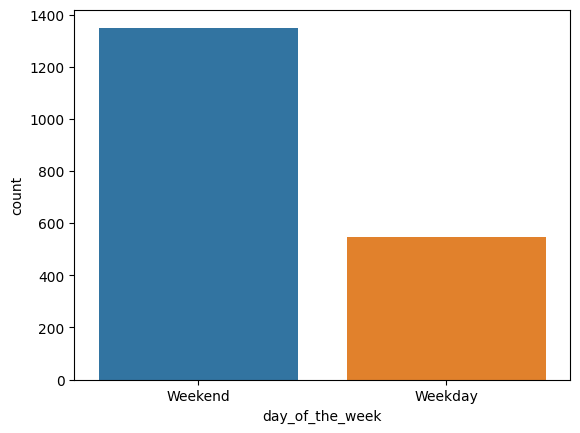

In [ ]:
sns.countplot(data = df, x = df['day_of_the_week'],hue = df['day_of_the_week'])

**Observation:** There are more orders on weekends are compared to weekday. About 71% of the total orders are on weekend.

#### Rating

In [ ]:
df['rating'].nunique()

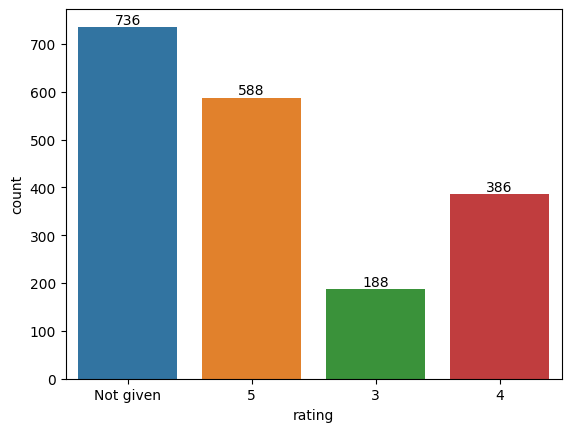

In [ ]:
ax = sns.countplot(data = df, x = df['rating'], hue = df['rating'])
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

**Observation:** Most of the orders (736) are not rated.
There are no ratings below 3.

#### Food Preparation Time

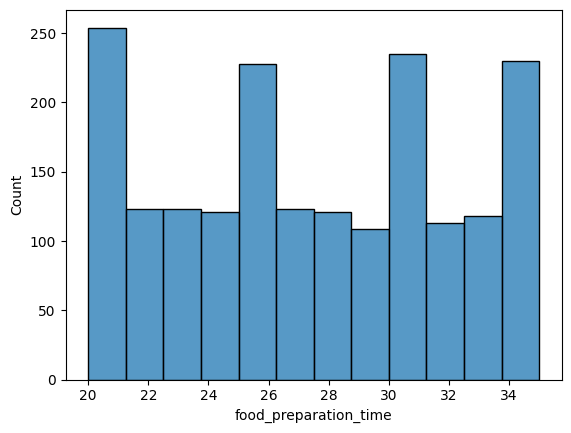

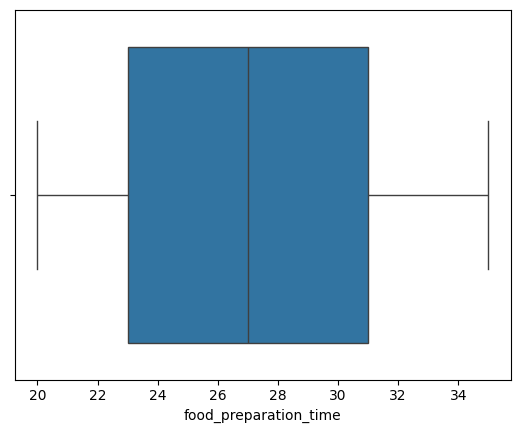

In [ ]:
sns.histplot(data = df, x = df['food_preparation_time'])
plt.show()
sns.boxplot(data = df, x = df['food_preparation_time'])
plt.show()

**Observation:** Average time of food preparation is 27 minutes. Most of the orders are prepared between 23 to 31 minutes.

#### Delivery Time

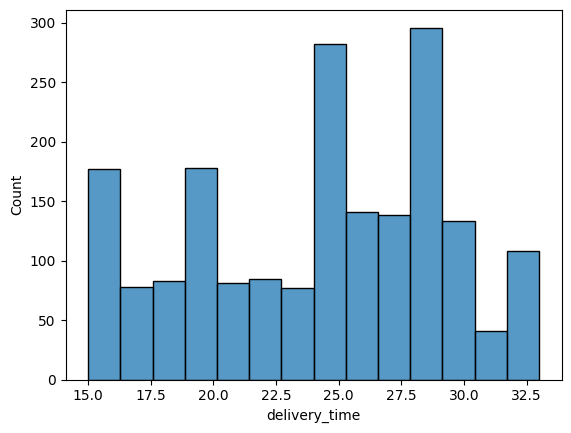

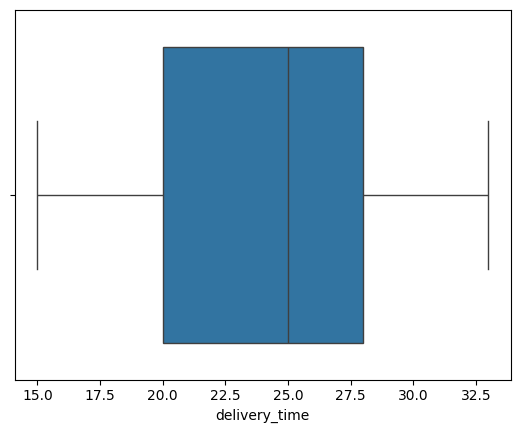

In [ ]:
sns.histplot(data = df, x = df['delivery_time'])
plt.show()
sns.boxplot(data = df, x = df['delivery_time'])
plt.show()

**Observation:** Average delivery time is 24 minutes. Most of the orders are delivered between 20 to 28 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
the top 5 restaurants in terms of the number of orders received are


1.   Shake Shack
2.   The Meatball Shop
3.   Blue Ribbon Sushi
4.   Blue Ribbon Fried Chicken
5.   Parm




### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
df_weekend = df[df['day_of_the_week']=='Weekend']
df_weekend['cuisine_type'].value_counts().head(5)

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:
The most popular cuisine ordered on weekends is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
df_order_cost_more_than_20 = df[df['cost_of_the_order'] > 20]
percentage = df_order_cost_more_than_20.shape[0]/df.shape[0] * 100
print(f'{percentage:.2f}% of the orders cost more than 20 dollars')


29.24% of the orders cost more than 20 dollars


#### Observations:
29.24% of the orders cost more than 20 dollars in the given dataset.


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
df_top_3_customers = df.groupby(['customer_id'])['order_id'].count().sort_values(ascending=False).head(3)
df_top_3_customers

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:
Customer IDs 52832, 47440, and 83287 are our most frequent customers, having placed 13, 10, and 9 orders, respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Delivery Day vs Delivery Time

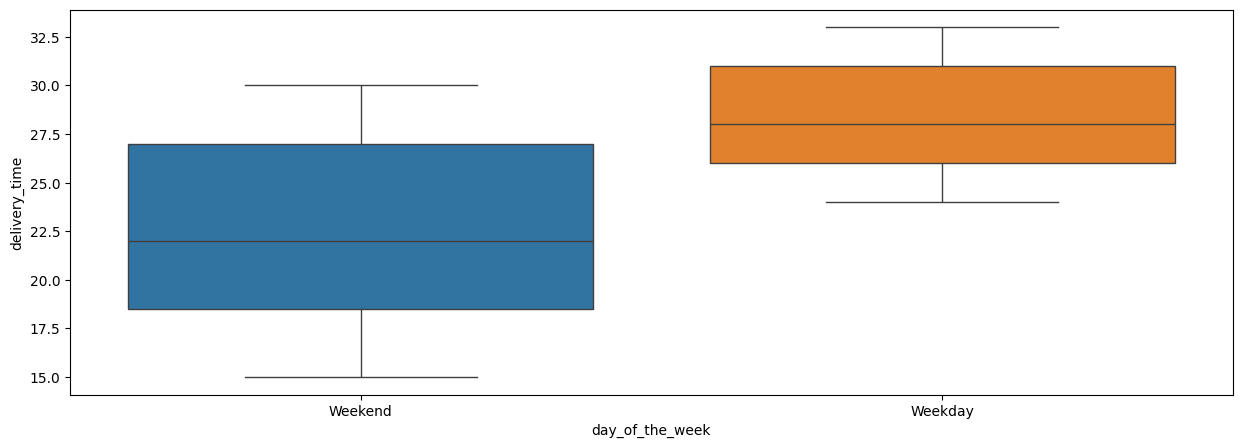

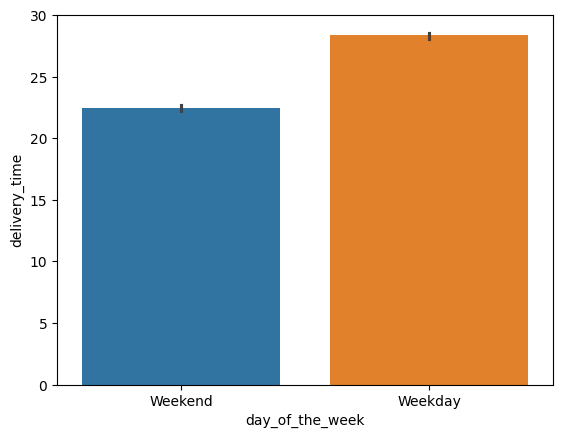

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = df['day_of_the_week'], y = df['delivery_time'], hue =df['day_of_the_week'])
plt.show()
sns.barplot(data = df, x = df['day_of_the_week'], y = df['delivery_time'], hue =df['day_of_the_week'])
plt.show()

**Observation:**
1. Delivery time is higher in weekday as compared to weekend.
2. Average delivery time in weekday is around 28 minutes and weekend is 22 minutes.
3. Minimum delivery time in weekday is more than average delivery time in weekend.

#### Cuisine vs Cost of the order

In [ ]:
df_cuisine_cost = df.groupby(['cuisine_type'])['cost_of_the_order'].mean().sort_values(ascending=False)
df_cuisine_cost

,cost_of_the_order
cuisine_type,
French,19.793889
Southern,19.300588
Thai,19.207895
Spanish,18.994167
Middle Eastern,18.820612
Mexican,16.933117
Indian,16.919726
Italian,16.418691
American,16.319829


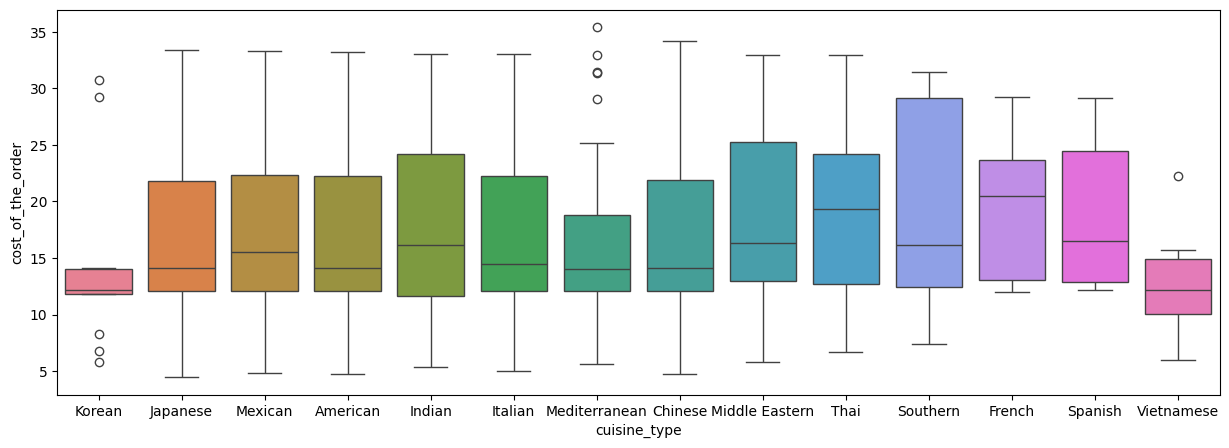

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = df['cuisine_type'], y = df['cost_of_the_order'], hue =df['cuisine_type'])
plt.show()




**Observation:**
1. The boxplots for Korean, Mediterrean and Vietnamese cuisine types show evidence of outliers for cost of the orders.
2. Cost of the order for Korean and Vietnamese cuisine type is low as comapered to other cuisine types.


#### Cuisine Type vs Food Preparation Time

In [ ]:
df_cuisine_prep_time = df.groupby(['cuisine_type'])['food_preparation_time'].mean().sort_values(ascending=False)
df_cuisine_prep_time

,food_preparation_time
cuisine_type,
Southern,27.588235
Chinese,27.511628
Japanese,27.510638
Italian,27.483221
American,27.440068
Thai,27.315789
Indian,27.109589
Mediterranean,27.000000
Spanish,26.916667


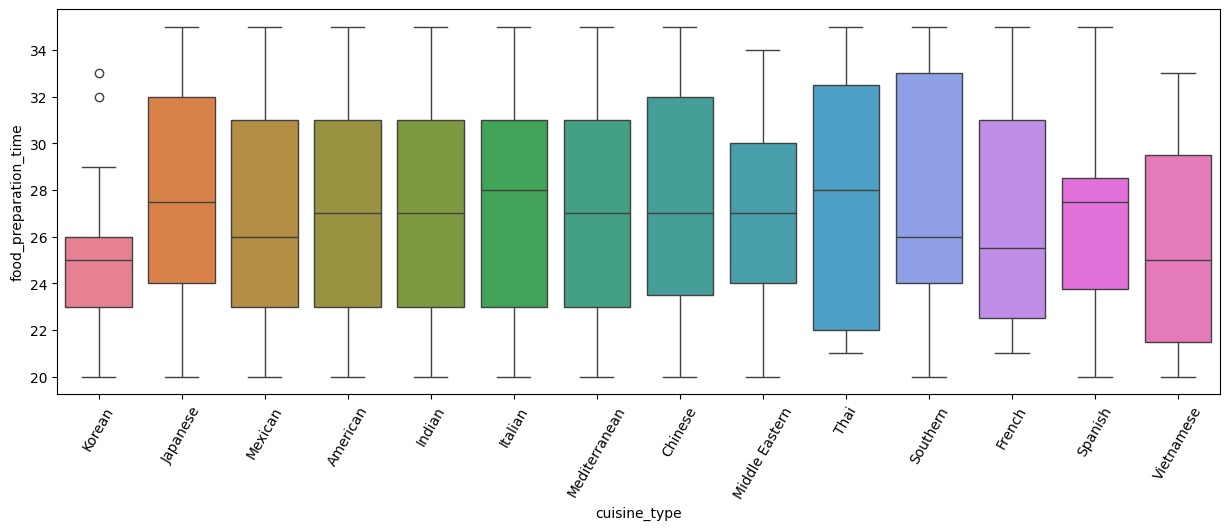

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = df['cuisine_type'], y = df['food_preparation_time'], hue =df['cuisine_type'])
plt.xticks(rotation = 60)
plt.show()

**Observation:**
1. Some outliers are observed for Korean cuisine type.
2. Average food preparation time for Korean cuisine is less as compared to other cuisine type.
3. The boxplot for Southern, French , Mexican cuisine is right skewed, which suggest that majority of the dishes ordered takes longer time to prepare for these cuisine type.
4. The box plot for Indian, American and Middle Eastern cuisine type food preparation time shows no skewness, which suggest that customers are equally likely to order both time-consuming and less time-consuming dishes.
5. The boxplot for Spanish, Italian and Thai cuisine type is left skewed,  which suggest that majority of the dishes ordered takes less time to prepare for these cuisine type.

#### Rating vs Delivery Time

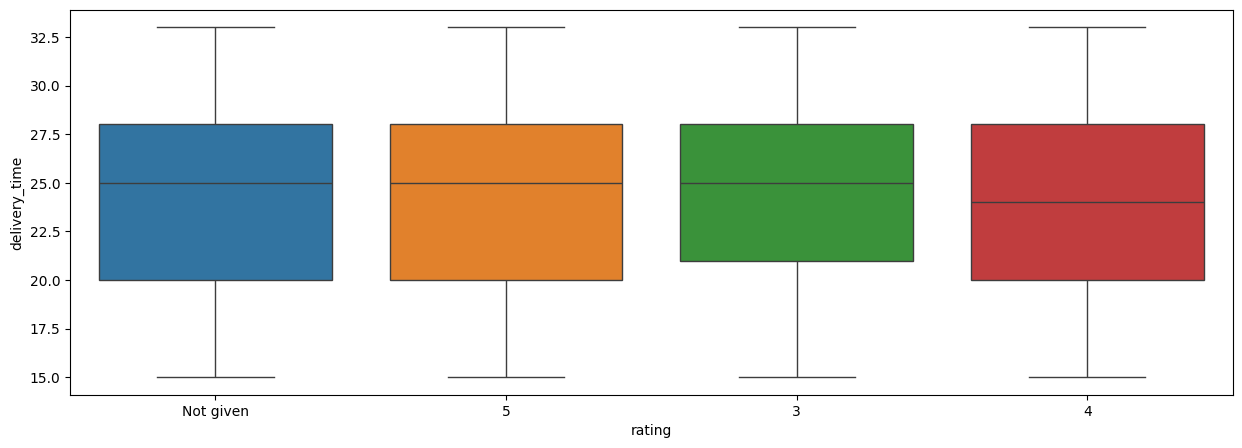

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = df['rating'], y = df['delivery_time'], hue =df['rating'])
plt.show()

**Observation:**
There is no significance difference between the distribution of delivery time and rating. There is no relationship between these two variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here

#Convert to Not Given rating to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df_restaurant_grouped = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])
df_restaurant_grouped.head()
df_restaurant_offer = df_restaurant_grouped.query('count > 50 and mean > 4').sort_values(by='count', ascending=False)
df_restaurant_offer

,count,mean
restaurant_name,,
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905
Blue Ribbon Sushi,73,4.219178
Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
Only 4 restaurants fulfilles the given criteria. Shake Shack has maximum ratings of 133.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here
def calculate_commission(cost_of_the_order):
  if cost_of_the_order > 20:
    return cost_of_the_order * 0.25
  elif cost_of_the_order > 5:
    return cost_of_the_order * 0.15
  else:
    return 0


In [ ]:
df['commision'] = df['cost_of_the_order'].apply(calculate_commission)
df.head()
print(f"The net revenue generated by the company is $",df['commision'].sum())

The net revenue generated by the company is $ 6166.303


#### Observations:


The net revenue generated by the company is $ 6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df_delivery_time = df[df['total_time'] > 60]
df_delivery_time.shape[0]
percentage = df_delivery_time.shape[0]/df.shape[0] * 100
print(f'{percentage:.2f}% of the orders take more than 60 minutes to get delivered')

10.54% of the orders take more than 60 minutes to get delivered


#### Observations:
About 10.54% of the total orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
df_weekday = df[df['day_of_the_week']=='Weekday']
df_weekend = df[df['day_of_the_week']== 'Weekend']
print('Mean delivery time during weekdays:',df_weekday['delivery_time'].mean().round(2))
print('Mean delivery time during weekends:',df_weekend['delivery_time'].mean().round(2))

print('Mean delivery time vary during weekdays and weekends :',(df_weekday['delivery_time'].mean() - df_weekend['delivery_time'].mean()).round(2) )

Mean delivery time during weekdays: 28.34
Mean delivery time during weekends: 22.47
Mean delivery time vary during weekdays and weekends : 5.87


#### Observations:
Weekday deliveries take longer than 5 minutes on average compared to weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
**Customer Preference:**
1. Cuisine: American cuisine is the most popular choice, accounting for 30.7% of all orders. Japanese cuisine follows closely at 24.7%, followed by Italian (15.7%), Chinese (11.3%), and Mexican (4%).
2. Ordering Patterns: Customers exhibit a strong preference for weekend dining, with 71.7% of orders originating on weekends compared to 28.1% on weekdays.

**Popular Restaurants:**
1. Top 5 restaurants which recieves most orders are Shake Shack, The Meatball Shop , Blue ribbon sushi , blue ribbon fried chicken.
2. These restaurants have average rating more than 4.

**Ratings:**

1. Out of 1898 orders, 736 orders are not rated, which is significantly huge number.
2. The dataset lacks ratings below 3, and a significant portion of orders (38%) are unrated.

### Recommendations:

 Areas of Focus


1. **Weekday Delivery Optimization**:
Weekday food delivery times are longer than weekend deliveries. Investigating the reasons behind this could lead to increased orders, especially among working professionals who value speed.
2. **Weekday Orders**:
The total number of orders on weekdays is substantially less than on weekends. Implementing incentives, special menus and reducing delivery times could encourage more customers to order during the weekdays.
3. **Increasing Revenue through High-Value Orders**:
Promote or focus on increasing the number of high value orders (above 20 dollars) to increase the revenue.  
The average cost of cuisines like French, Southern and Thai is around 19 dollars, promote these cuisines more to increase the revenue.
4. **Enhancing Customer Loyalty**:
Despite having 1200 unique customers, only 1 customer have made more than 10 orders. Implementing a customer loyalty program or offering incentives could significantly boost customer retention and repeat business.
5. **Improving Customer Feedback**:
Missing customer ratings and absence of ratings below 3. Customer feedback is important to understand where we are lacking. Check the data source if it is filtering some ratings.









---